# Лабораторная работа №11

In [1]:
import os
from glob import iglob
from typing import Tuple
from zipfile import ZipFile

import numpy as np
from matplotlib import pyplot as plt
from more_itertools import windowed
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

### Загрузка данных

In [17]:
def cons_xor(x):
    xor = 0
    new_x = []
    for x_i in x:
        xor ^= x_i
        new_x.append(xor)
    return new_x

def load_data(base=8, path="data") -> Tuple[np.ndarray, np.ndarray]:
    """Returns a tuple with matrix of features and vector of outputs."""
    features = []
    labels = []
    with ZipFile(os.path.join(path, f"Base{base}.zip"), "r") as zf:
        for name in zf.namelist():
            with zf.open(name, "r") as f:
                for line in f:
                    feature_str, label_str = line.split()
                    features.append(cons_xor(np.array(list(feature_str))))
                    labels.append(int(label_str))
    return np.array(features), np.array(labels)

BASE8_FEATURES, BASE8_LABELS = load_data()
(
    BASE8_TRAIN_FEATURES,
    BASE8_TEST_FEATURES,
    BASE8_TRAIN_LABELS,
    BASE8_TEST_LABELS
) = train_test_split(BASE8_FEATURES, BASE8_LABELS, train_size=0.80)

print(f"BASE8 train features shape: {BASE8_TRAIN_FEATURES.shape}")
print(f"BASE8 train labels shape: {BASE8_TRAIN_LABELS.shape}")
print(f"BASE8 test features shape: {BASE8_TEST_FEATURES.shape}")
print(f"BASE8 test labels shape: {BASE8_TEST_LABELS.shape}")

BASE8 train features shape: (800000, 8)
BASE8 train labels shape: (800000,)
BASE8 test features shape: (200000, 8)
BASE8 test labels shape: (200000,)


### Обучение модели при помощи алгоритма стохастического градиентного спуска

In [18]:
sgd_clf = SGDClassifier(loss="log", penalty="l2", n_jobs=-1).fit(BASE8_TRAIN_FEATURES, BASE8_TRAIN_LABELS)
sgd_score = sgd_clf.score(BASE8_TEST_FEATURES, BASE8_TEST_LABELS)

print(f"SGD score = {sgd_score:.2%}")

SGD score = 99.26%


### Обучение модели при помощи деревьев решений

In [19]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=3).fit(BASE8_TRAIN_FEATURES, BASE8_TRAIN_LABELS)
tree_score = tree_clf.score(BASE8_TEST_FEATURES, BASE8_TEST_LABELS)

print(f"Decision tree score = {tree_score:.2%}")

Decision tree score = 100.00%


### Обучение модели при помощи метода опорных векторов

In [20]:
svc_clf = LinearSVC().fit(BASE8_TRAIN_FEATURES[:1000], BASE8_TRAIN_LABELS[:1000])
svc_score = svc_clf.score(BASE8_TEST_FEATURES[:1000], BASE8_TEST_LABELS[:1000])

print(f"SVC score: {svc_score:.2%}")

SVC score: 91.30%


/home/dmitry/.local/share/virtualenvs/machine-learning-9F9U4Ci9/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Зависимость качества моделей от количества примеров

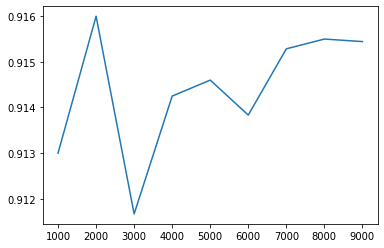

In [21]:
sizes = range(1000, 10000, 1000)
scores = []
for size in range(1000, 10000, 1000):
    clf = DecisionTreeClassifier(min_samples_leaf=3).fit(BASE8_TRAIN_FEATURES[:size], BASE8_TRAIN_LABELS[:size])
    score = svc_clf.score(BASE8_TEST_FEATURES[:size], BASE8_TEST_LABELS[:size])
    scores.append(score)

plt.plot(sizes, scores)
plt.show()